In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Image size MobileNetV2 expects
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32

dataset_path = r"C:\Users\Kaiwalya\OneDrive\Desktop\asl detection\asl_dataset"

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True
)

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# Load MobileNetV2 without top layers
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze base

# Add custom head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=3),
    ModelCheckpoint("mobilenet_asl_best.h5", save_best_only=True)
]

# Train
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    callbacks=callbacks
)


Found 2012 images belonging to 36 classes.
Found 503 images belonging to 36 classes.
Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 744ms/step - accuracy: 0.1183 - loss: 3.4724

63/63 ━━━━━━━━━━━━━━━━━━━━ 68s 1s/step - accuracy: 0.1197 - loss: 3.4637 - val_accuracy: 0.4553 - val_loss: 2.0224
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step - accuracy: 0.4528 - loss: 1.9317

63/63 ━━━━━━━━━━━━━━━━━━━━ 38s 601ms/step - accuracy: 0.4532 - loss: 1.9299 - val_accuracy: 0.6103 - val_loss: 1.4770
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step - accuracy: 0.5678 - loss: 1.4796

63/63 ━━━━━━━━━━━━━━━━━━━━ 38s 606ms/step - accuracy: 0.5681 - loss: 1.4783 - val_accuracy: 0.6421 - val_loss: 1.3001
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step - accuracy: 0.6574 - loss: 1.2077

63/63 ━━━━━━━━━━━━━━━━━━━━ 38s 608ms/step - accuracy: 0.6576 - loss: 1.2069 - val_accuracy: 0.7038 - val_loss: 1.0601
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step - accuracy: 0.6843 - loss: 1.0629

63/63 ━━━━━━━━━━━━━━━━━━━━ 39s 616ms/step - accuracy: 0.6844 - loss: 1.0627 - val_accuracy: 0.7197 - val_loss: 0.9775
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step - accuracy: 0.7351 - loss: 0.9089

63/63 ━━━━━━━━━━━━━━━━━━━━ 39s 612ms/step - accuracy: 0.7353 - loss: 0.9087 - val_accuracy: 0.7535 - val_loss: 0.8533
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step - accuracy: 0.7545 - loss: 0.8650

63/63 ━━━━━━━━━━━━━━━━━━━━ 39s 617ms/step - accuracy: 0.7547 - loss: 0.8646 - val_accuracy: 0.7495 - val_loss: 0.8416
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step - accuracy: 0.7815 - loss: 0.7658

63/63 ━━━━━━━━━━━━━━━━━━━━ 40s 632ms/step - accuracy: 0.7816 - loss: 0.7657 - val_accuracy: 0.7813 - val_loss: 0.7527
Epoch 9/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step - accuracy: 0.8010 - loss: 0.7176

63/63 ━━━━━━━━━━━━━━━━━━━━ 39s 611ms/step - accuracy: 0.8008 - loss: 0.7177 - val_accuracy: 0.7634 - val_loss: 0.7428
Epoch 10/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step - accuracy: 0.8131 - loss: 0.6664

63/63 ━━━━━━━━━━━━━━━━━━━━ 39s 618ms/step - accuracy: 0.8130 - loss: 0.6666 - val_accuracy: 0.7992 - val_loss: 0.6920


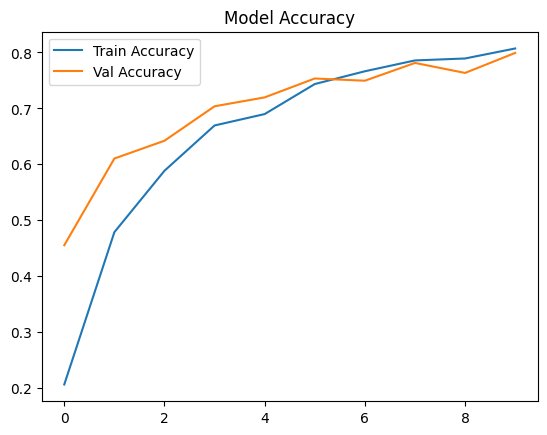

In [4]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Model Accuracy")
plt.legend()
plt.show()


In [5]:
model.save("asl_alphabet_model.h5")
